In [390]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras import Sequential, layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
df = pd.read_csv('Credit_card.csv')
df_label = pd.read_csv('Credit_card_label.csv')
pd.set_option('display.max_columns', None)
df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


# 1. DATA PREPROCESSING (ENCODING CLEANING)

In [391]:
df.isna().sum()
# Drop kolom yang tidak akan diapakai untuk prediksi
df.drop(['Ind_ID'], axis=1, inplace=True)
# Encode kolom yang kategorikal
min_max_scaler = MinMaxScaler()
df[['Birthday_count', 'Employed_days', 'Annual_income']] = min_max_scaler.fit_transform(df[['Birthday_count', 'Employed_days','Annual_income']])


df["Annual_income"].fillna(df["Annual_income"].mean(), inplace=True)
df["GENDER"].fillna(df["GENDER"].mode()[0], inplace=True)
df["Type_Occupation"].fillna(df["GENDER"].mode()[0], inplace=True)
df["Birthday_count"].fillna(df["Birthday_count"].mode()[0], inplace=True)
col = ['GENDER', 'Car_Owner','Propert_Owner','Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(10)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,1,1,1,0,0.094891,1,1,1,1,0.358100,1.000000,1,0,0,0,5,2
1,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
2,0,1,0,0,0.182482,0,1,1,1,0.132881,0.037621,1,1,1,0,5,2
3,0,1,0,0,0.102287,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
4,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
5,0,1,0,0,0.182482,1,1,1,1,0.660577,0.037621,1,1,1,0,5,2
6,0,1,0,0,0.182482,0,1,1,1,0.660577,0.037621,1,1,1,0,5,2
7,0,0,0,0,0.094891,1,4,1,1,0.163100,1.000000,1,0,0,0,5,2
8,1,1,1,1,0.270073,0,4,1,1,0.392843,0.037379,1,0,1,1,3,3
9,1,1,1,1,0.270073,1,4,1,1,0.392843,0.037379,1,0,1,1,3,3


# 2. MENGECEK KORELASI ANTAR KOLOM FEATURE

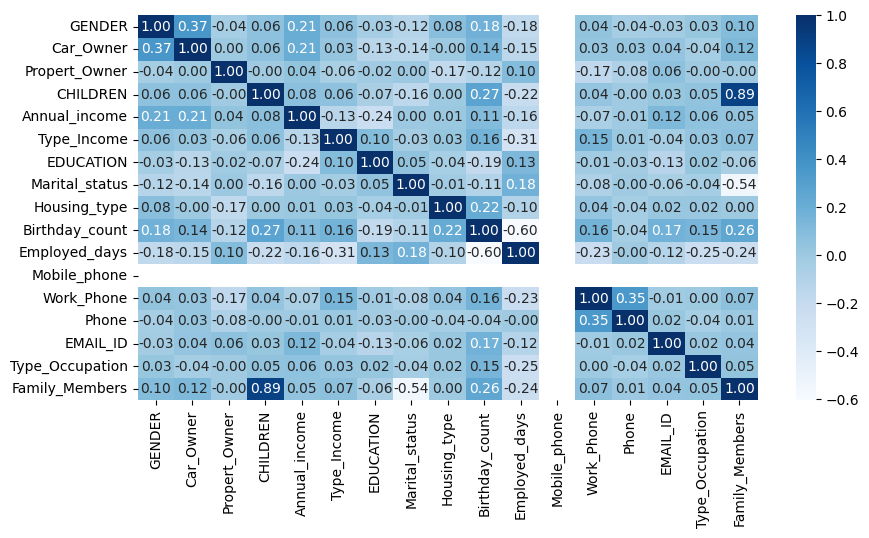

In [392]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='Blues', fmt='.2f')
plt.show()

# 3. SPLITTING DATA

In [393]:
X = df
y = df_label['label']

X_train, X_test, y_train, y_test =  train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Membuat Model, dengan activation "relu" dan "dan "sigmoid"

optimizer = adam, loss = binary_crossentropy, dan matrics = accuracy

In [394]:
from keras.api._v2.keras import activations
model = Sequential([
    layers.Dense(
        16,
        activation='relu',
        input_shape=[17]
    ),
    layers.Dense(
        32,
        activation = 'relu'
    ),
    layers.Dense(
        1,
        activation='sigmoid'
    ),
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [395]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# 5. Membuat fungsi Callback

In [396]:
from tensorflow.keras.callbacks import EarlyStopping

# Membuat callback untuk early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# 6. Proses Learning data

In [397]:
trained_data = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, callbacks=early_stop)

Epoch 1/500
39/39 [==============================] - 2s 8ms/step - loss: 0.8161 - accuracy: 0.4483 - val_loss: 0.4743 - val_accuracy: 0.9032
Epoch 2/500
39/39 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.8829 - val_loss: 0.3352 - val_accuracy: 0.9032
Epoch 3/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3688 - accuracy: 0.8829 - val_loss: 0.3315 - val_accuracy: 0.9032
Epoch 4/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.8829 - val_loss: 0.3305 - val_accuracy: 0.9032
Epoch 5/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3633 - accuracy: 0.8829 - val_loss: 0.3287 - val_accuracy: 0.9032
Epoch 6/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3624 - accuracy: 0.8829 - val_loss: 0.3282 - val_accuracy: 0.9032
Epoch 7/500
39/39 [==============================] - 0s 3ms/step - loss: 0.3625 - accuracy: 0.8829 - val_loss: 0.3282 - val_accuracy: 0.9032
Epoch 8/500
3

# 7. Predict Data

In [398]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.111, 1, 0).reshape(-1)
y_pred

10/10 [==============================] - 0s 2ms/step


array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

# 8. Menampilkan hasil Accuracy

In [399]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.7419354838709677

# 9. MemBuat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training

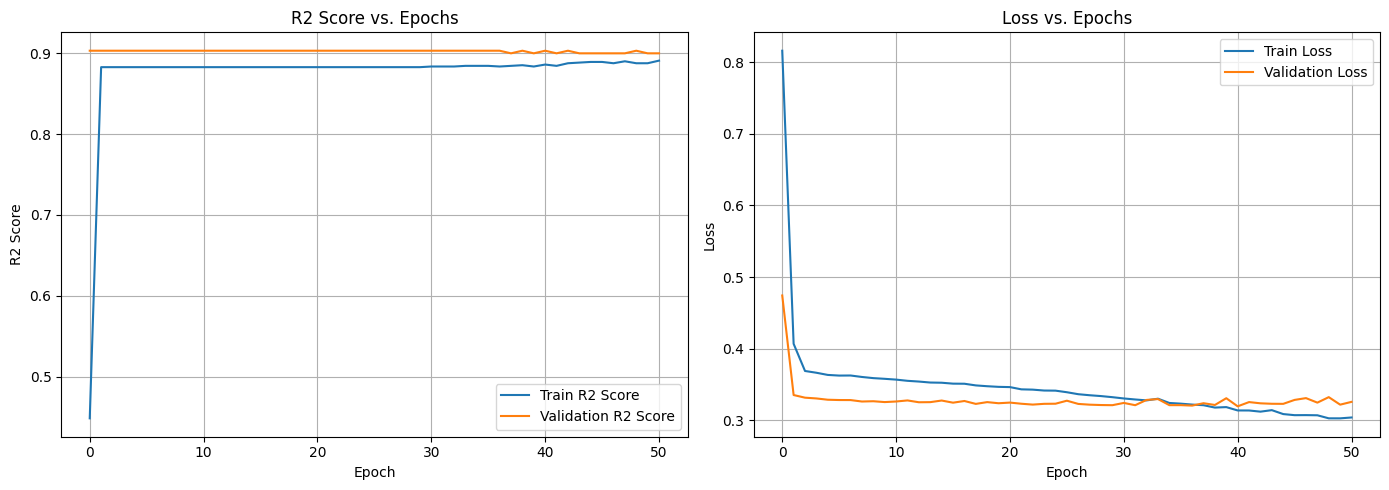

In [400]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(trained_data.history['accuracy'], label='Train R2 Score')
plt.plot(trained_data.history['val_accuracy'], label='Validation R2 Score')
plt.title('R2 Score vs. Epochs')
plt.ylabel('R2 Score')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

# Buat grafik Loss
plt.subplot(1, 2, 2)
plt.plot(trained_data.history['loss'], label='Train Loss')
plt.plot(trained_data.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()